## Evaluation

Exercise 1: Saliency Maps from Local Standard Deviation

1.)
>Read in and plot an RGB image with separated channels - <span style="color:red">1/1</span><br>
>Compute the correlation coefficients - <span style="color:red">1/1</span><br>
>Discuss the correlations - <span style="color:red">1/1</span><br>

2.)
>Convert to and plot HSV image- <span style="color:red">1/1</span><br>
>Compute the correlation coefficients - <span style="color:red">1/1</span><br>
>Discuss the correlations - <span style="color:red">1/1</span><br>

3.)
>Saliency image: Extract patches from the image and compute standard deviation - <span style="color:red">2/3 *(Assigning standard deviations to pixels is done incorrectly at the edges of the image. There is an incorrect offset in the following when e.g. max/min saliency is computed. Fix below.)*</span><br>

4.)
>Plot and discuss saliency channels - <span style="color:red">1/1</span><br>

5.)
>Sum saliency channels - <span style="color:red">1/1</span><br>

6.)
>Smooth by gaussian filtering - <span style="color:red">0.5/1 *(The chosen standard deviation is quite high without justification.)*</span><br>

7.)
>Overlay the image with the saliency contours - <span style="color:red">2/2</span><br>

8.)
>Compute min/max attractiveness, plot and discuss - <span style="color:red">2/2</span><br>

9.)
>Repeat for all images - <span style="color:red">1/1</span><br>
>Discuss two shortcomings by example - <span style="color:red">2/2</span><br>

10.)
>Discuss possible extensions - <span style="color:red">0/1</span><br>


Exercise 2: Mexican-Hat Convolution

1.)- 5.)
>Convolve the channels with a mexican hat filter - <span style="color:red">+0</span><br>
>Experiment with boundary conditions - <span style="color:red">+0</span><br>
>Combined saliency map, low-pass filtering - <span style="color:red">+0</span><br>
>Contours and maxima - <span style="color:red">+0</span><br>
>Discussion - <span style="color:red">+0</span><br>

Total <span style="color:red">17.5/20</span><br>

```
salMap_hue = np.zeros((hue.shape[0]-14,hue.shape[1]-14))
salMap_sat = np.zeros((hue.shape[0]-14,hue.shape[1]-14))
salMap_val = np.zeros((hue.shape[0]-14,hue.shape[1]-14))


#loop over the image dimensions
#iterate over cartesian product
#idea for ranging: leave border in the image of 7 px
for (i,j) in it.product(range (7,hue.shape[0]-7),range (7,hue.shape[1]-7)):
    
    #extract the patches for each channel
    patch_hue = hue[i-7:i+7,j-7:j+7]
    patch_sat = sat[i-7:i+7,j-7:j+7]
    patch_val = val[i-7:i+7,j-7:j+7]
    
    # incorrect
    #compute the std dev and save to saliency map
    #salMap_hue[i-14,j-14] = sst.circstd(patch_hue, high = 1)
    #salMap_sat[i-14,j-14] = np.std(patch_sat)
    #salMap_val[i-14,j-14] = np.std(patch_val)
    
    # fix
    salMap_hue[i-7,j-7] = sst.circstd(patch_hue, high = 1)
    salMap_sat[i-7,j-7] = np.std(patch_sat)
    salMap_val[i-7,j-7] = np.std(patch_val)

saliency_image = np.stack([salMap_hue, salMap_sat, salMap_val])
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import scipy as sp
import scipy.stats as sst
import scipy.ndimage as snd

#iterate over things
import itertools as it

# 1.

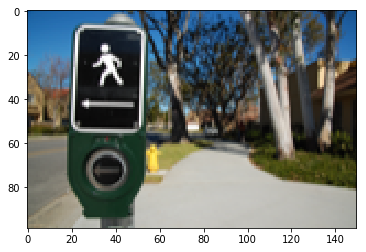

In [2]:
img = plt.imread('./salience/salience_01.png')

plt.imshow(img)
plt.show()

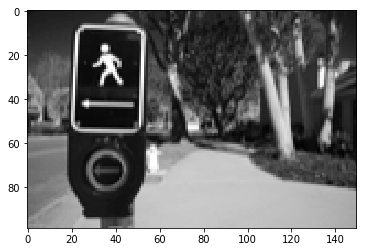

In [3]:
red = img[:,:,0]
plt.imshow(red,cmap='gray')
plt.show()

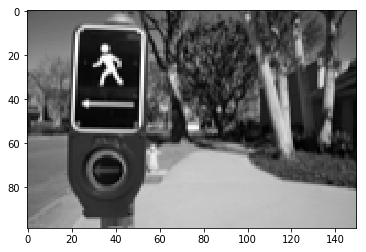

In [4]:
green = img[:,:,1]
plt.imshow(green,cmap='gray')
plt.show()

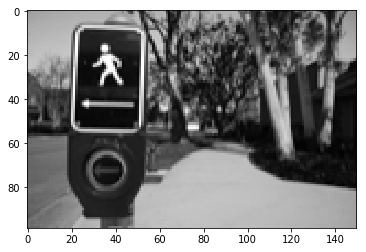

In [5]:
blue = img[:,:,2]
plt.imshow(blue,cmap='gray')
plt.show()

In [6]:
r_flat = red.flatten()
g_flat = green.flatten()
b_flat = blue.flatten()

m = np.stack([r_flat,g_flat,b_flat])
#compute correlation between the colours
corr = np.corrcoef(m)
corr

array([[1.        , 0.94512747, 0.76406375],
       [0.94512747, 1.        , 0.91688974],
       [0.76406375, 0.91688974, 1.        ]])

Is there anything striking in the correlations? 
- correlatoin is very high

Why is this not surprising given the way natural images arise (hint: think about what determines the content of a photograph of a natural scene)?
- for pigmentation and illuminating a picture you need high RGB values. white is the maximum value for all RGB channels and therefore correlation gets higher in a brighter foto.

# 2.

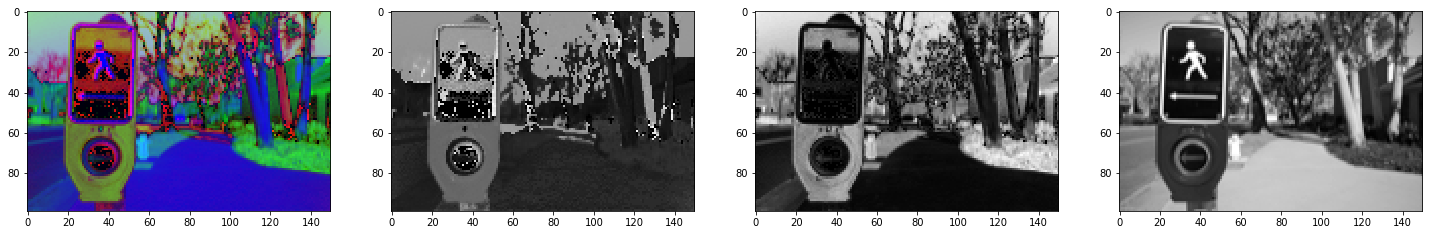

In [7]:
#convert image to HSV space: hue, saturation, value
hsl = col.rgb_to_hsv(img)
hue = hsl[:,:,0]
sat = hsl[:,:,1]
val = hsl[:,:,2]

fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(25,5))
ax[0].imshow(hsl, cmap='gray')
ax[1].imshow(hue, cmap='gray')
ax[2].imshow(sat, cmap='gray')
ax[3].imshow(val, cmap='gray')
plt.show()

In [8]:
m_h = np.stack([hue.flatten(),sat.flatten(),val.flatten()])
#compute correlation between the colours
corr_h = np.corrcoef(m_h)
print ('RGB correlation:\n',corr)
print ('HSV correlation:\n',corr_h)

RGB correlation:
 [[1.         0.94512747 0.76406375]
 [0.94512747 1.         0.91688974]
 [0.76406375 0.91688974 1.        ]]
HSV correlation:
 [[ 1.          0.32958264 -0.08134197]
 [ 0.32958264  1.         -0.16244643]
 [-0.08134197 -0.16244643  1.        ]]


Explain why there is less correlation now!
- as HSV is referring to the hue, the saturation and the value it reflects more independent causes in the picture compared to RGB representation. THis is also more similar to the human color perception. 

# 3. 

In [9]:
salMap_hue = np.zeros((hue.shape[0]-14,hue.shape[1]-14))
salMap_sat = np.zeros((hue.shape[0]-14,hue.shape[1]-14))
salMap_val = np.zeros((hue.shape[0]-14,hue.shape[1]-14))


#loop over the image dimensions
#iterate over cartesian product
#idea for ranging: leave border in the image of 7 px
for (i,j) in it.product(range (7,hue.shape[0]-7),range (7,hue.shape[1]-7)):
    
    #extract the patches for each channel
    patch_hue = hue[i-7:i+7,j-7:j+7]
    patch_sat = sat[i-7:i+7,j-7:j+7]
    patch_val = val[i-7:i+7,j-7:j+7]
    
    #compute the std dev and save to saliency map
    #salMap_hue[i-14,j-14] = sst.circstd(patch_hue, high = 1)
    #salMap_sat[i-14,j-14] = np.std(patch_sat)
    #salMap_val[i-14,j-14] = np.std(patch_val)
    
    salMap_hue[i-7,j-7] = sst.circstd(patch_hue, high = 1)
    salMap_sat[i-7,j-7] = np.std(patch_sat)
    salMap_val[i-7,j-7] = np.std(patch_val)

saliency_image = np.stack([salMap_hue, salMap_sat, salMap_val])

In [11]:
saliency_image.shape

(3, 85, 136)

# 4.

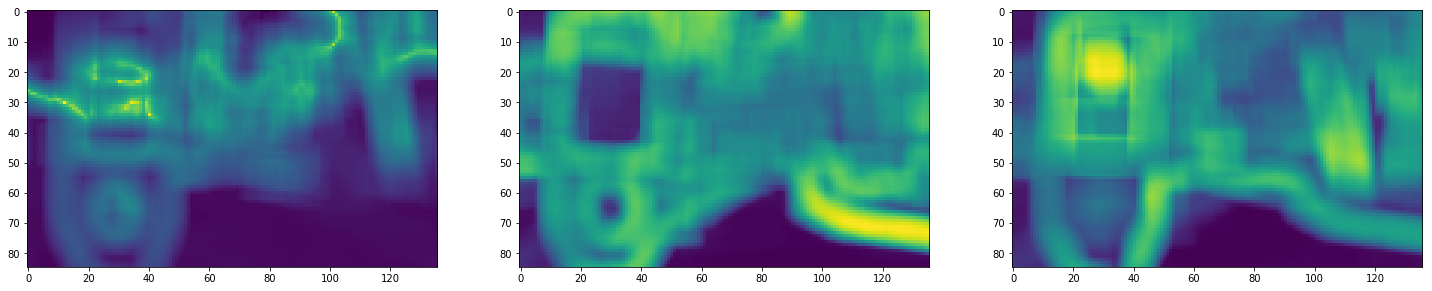

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(25,5))
ax[0].imshow(saliency_image[0,:,:])
ax[1].imshow(saliency_image[1,:,:])
ax[2].imshow(saliency_image[2,:,:])
plt.show()

How is each of the three images related to the
visual properties of the image?
- first: hue. it specifies the dominant wavelength of the color, the type of color
- second: saturation. this corresponds to the adding of pure white to a simulated sprectral color. especially black white borders have a hight std deviation. it can be seen on the border of the street that is very bright
- third: value. this is a parameter for the total energy content 

# 5.

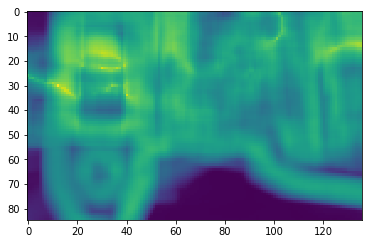

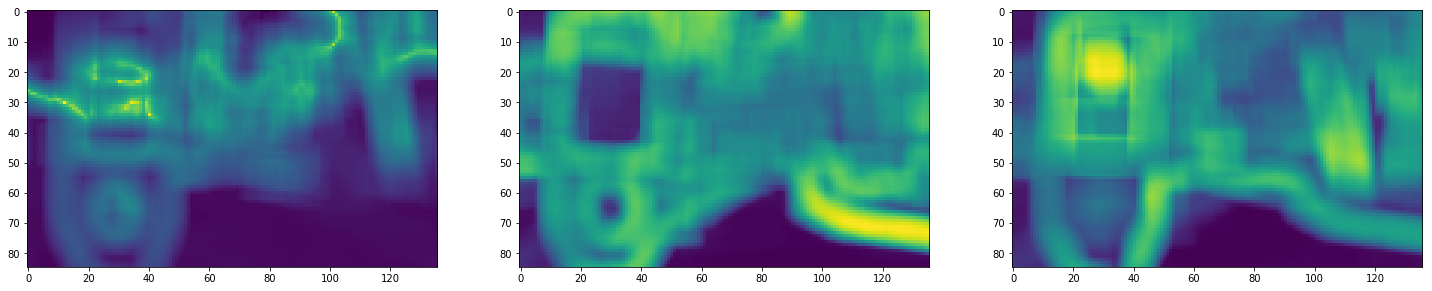

In [13]:
jointMap = saliency_image[0,:,:]+saliency_image[1,:,:]+saliency_image[2,:,:]
plt.imshow(jointMap)
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(25,5))
ax[0].imshow(saliency_image[0,:,:])
ax[1].imshow(saliency_image[1,:,:])
ax[2].imshow(saliency_image[2,:,:])
plt.show()

# 6. 

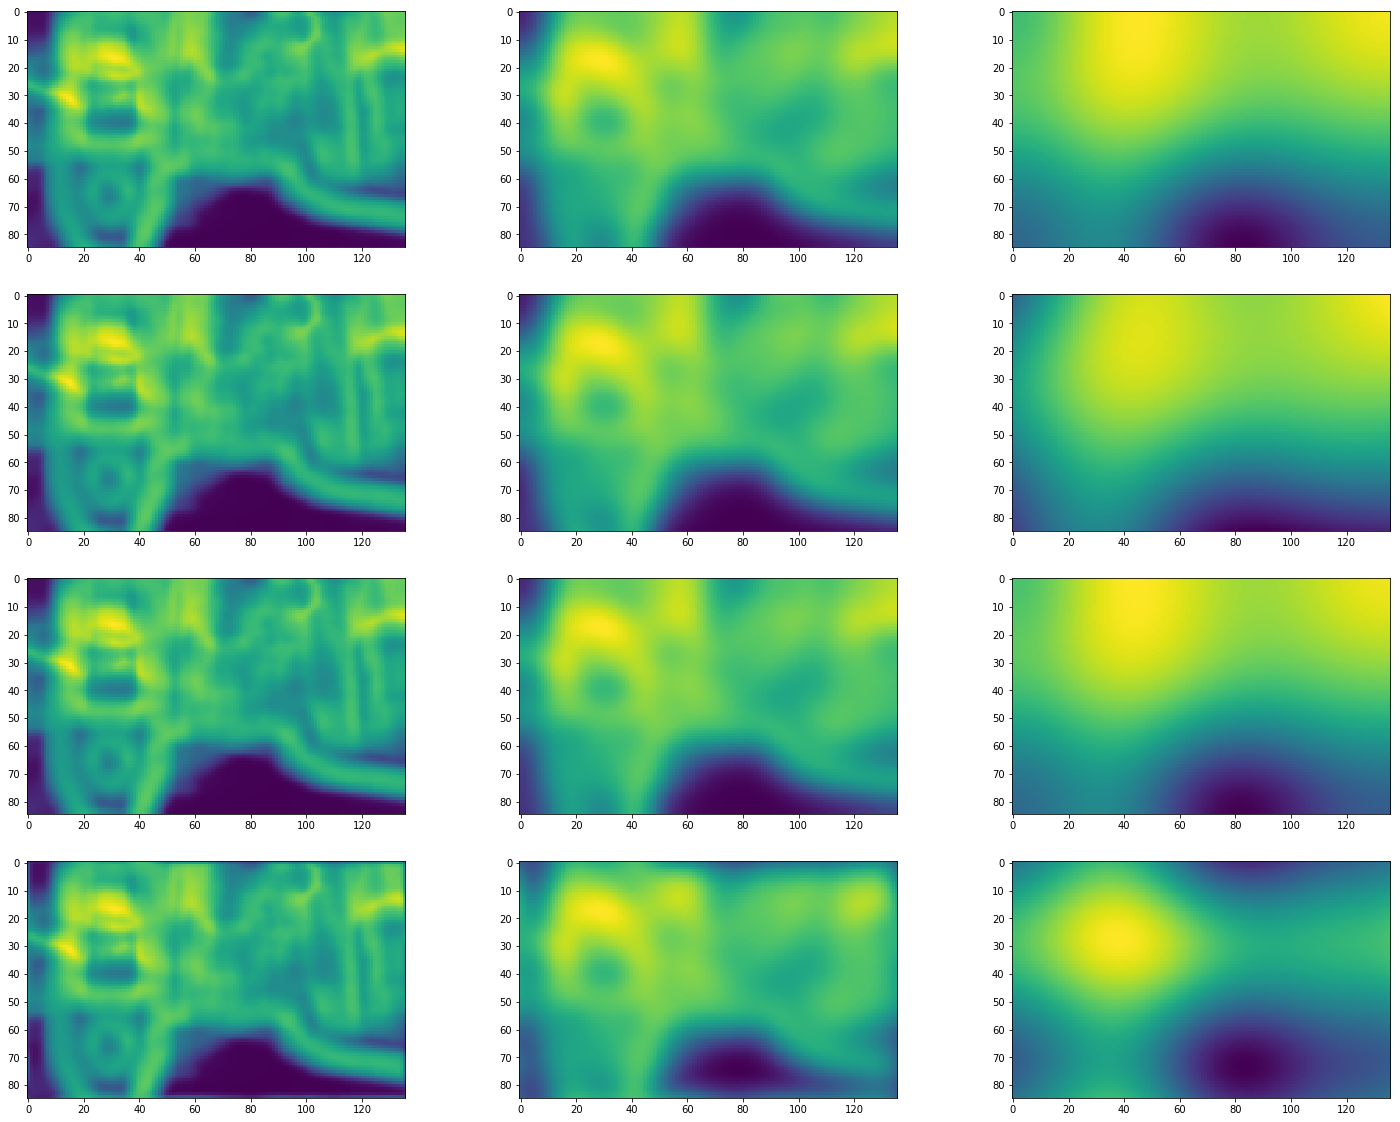

In [14]:
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(25,20))
ax[0][0].imshow(snd.gaussian_filter(jointMap,1.0,mode='reflect'))
ax[0][1].imshow(snd.gaussian_filter(jointMap,5,mode='reflect'))
ax[0][2].imshow(snd.gaussian_filter(jointMap,20,mode='reflect'))
ax[1][0].imshow(snd.gaussian_filter(jointMap,1.0,mode='nearest'))
ax[1][1].imshow(snd.gaussian_filter(jointMap,5,mode='nearest'))
ax[1][2].imshow(snd.gaussian_filter(jointMap,20,mode='nearest'))
ax[2][0].imshow(snd.gaussian_filter(jointMap,1.0,mode='mirror'))
ax[2][1].imshow(snd.gaussian_filter(jointMap,5,mode='mirror'))
ax[2][2].imshow(snd.gaussian_filter(jointMap,20,mode='mirror'))
ax[3][0].imshow(snd.gaussian_filter(jointMap,1.0,mode='wrap'))
ax[3][1].imshow(snd.gaussian_filter(jointMap,5,mode='wrap'))
ax[3][2].imshow(snd.gaussian_filter(jointMap,20,mode='wrap'))
plt.show()

modes: 'reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap'

# 7. / 8.

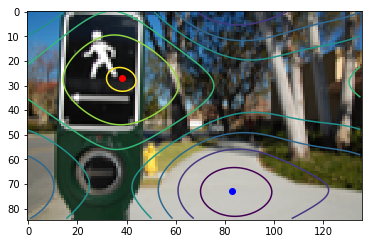

In [15]:
filtered_map = snd.gaussian_filter(jointMap,20,mode='wrap')

max_val = np.unravel_index(np.argmax(filtered_map),(filtered_map.shape))
min_val = np.unravel_index(np.argmin(filtered_map),(filtered_map.shape))


img_small = img[7:-7,7:-7,:]
plt.imshow(img_small)
plt.contour(filtered_map)
plt.plot(max_val[1],max_val[0],'o',color = 'red')
plt.plot(min_val[1],min_val[0],'o',color = 'blue')
plt.show()


interpretation: 
- the red dot is the point with the highest prediction value for the first attention of a human observer. the contourlines illustrate kind of a probability distribution over the image. "probability" is getting smaller and smaller with the colors yellow->green->blue->purple.
- the blue dot is the less likeliest point an oberserver will look at when he sees the image the first time. 
- this is just meant for the first glimpse as an human observer will start to explore the image when looking at it for serveral seconds.

# 9.

In [18]:
#function to plot saliency map with max / min point inside input image
def plot_saliency_map(img):
    #convert image to HSV space: hue, saturation, value
    hsl = col.rgb_to_hsv(img)
    hue = hsl[:,:,0]
    sat = hsl[:,:,1]
    val = hsl[:,:,2]

    salMap_hue = np.zeros((hue.shape[0]-14,hue.shape[1]-14))
    salMap_sat = np.zeros((hue.shape[0]-14,hue.shape[1]-14))
    salMap_val = np.zeros((hue.shape[0]-14,hue.shape[1]-14))

    #loop over the image dimensions
    #iterate over cartesian product
    #idea for ranging: leave border in the image of 7 px
    for (i,j) in it.product(range (7,hue.shape[0]-7),range (7,hue.shape[1]-7)):
    
        #extract the patches for each channel
        patch_hue = hue[i-7:i+7,j-7:j+7]
        patch_sat = sat[i-7:i+7,j-7:j+7]
        patch_val = val[i-7:i+7,j-7:j+7]

        #compute the std dev and save to saliency map
        #salMap_hue[i-14,j-14] = sst.circstd(patch_hue, high = 1)
        #salMap_sat[i-14,j-14] = np.std(patch_sat)
        #salMap_val[i-14,j-14] = np.std(patch_val)
        
        salMap_hue[i-7,j-7] = sst.circstd(patch_hue, high = 1)
        salMap_sat[i-7,j-7] = np.std(patch_sat)
        salMap_val[i-7,j-7] = np.std(patch_val)

    saliency_image = np.stack([salMap_hue, salMap_sat, salMap_val])
    
    jointMap = saliency_image[0,:,:]+saliency_image[1,:,:]+saliency_image[2,:,:]
    filtered_map = snd.gaussian_filter(jointMap,20,mode='wrap')
    
    max_val = np.unravel_index(np.argmax(filtered_map),(filtered_map.shape))
    min_val = np.unravel_index(np.argmin(filtered_map),(filtered_map.shape))
    
    img_small = img[7:-7,7:-7,:]
    plt.imshow(img_small)
    plt.contour(filtered_map)
    plt.plot(max_val[1],max_val[0],'o',color = 'red')
    plt.plot(min_val[1],min_val[0],'o',color = 'blue')
    plt.show()

salience/salience_11.png


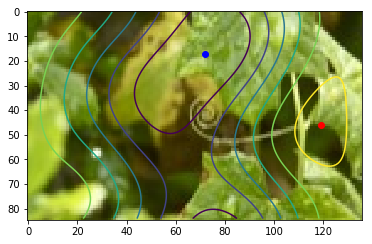

salience/salience_07.png


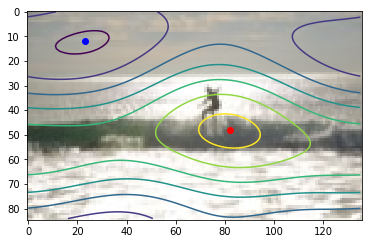

salience/salience_09.png


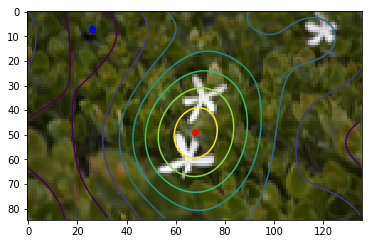

salience/salience_05.png


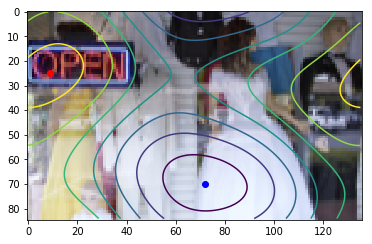

salience/salience_12.png


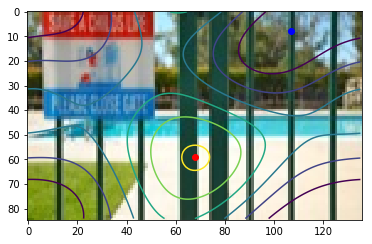

salience/salience_04.png


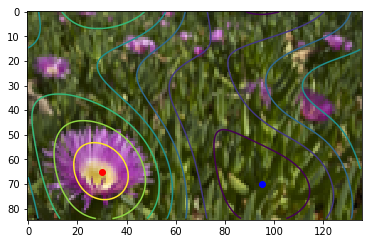

salience/salience_02.png


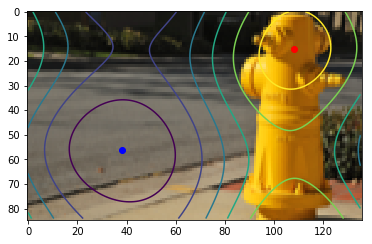

salience/salience_06.png


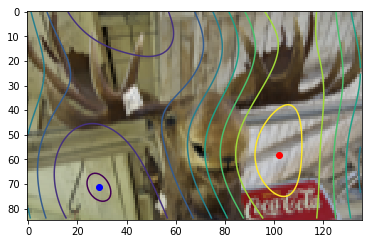

salience/salience_14.png


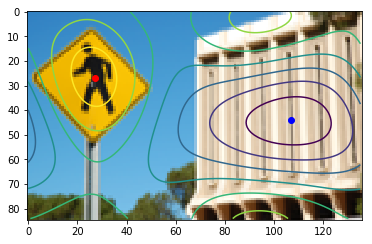

salience/salience_08.png


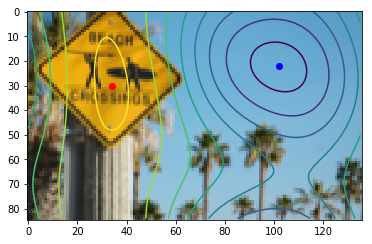

salience/salience_10.png


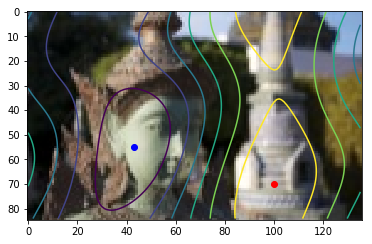

salience/salience_20.png


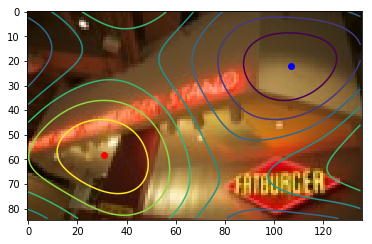

salience/salience_03.png


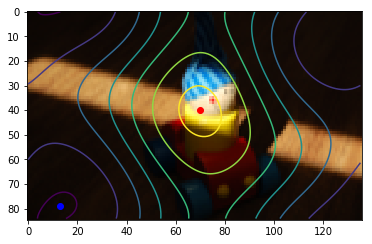

salience/salience_19.png


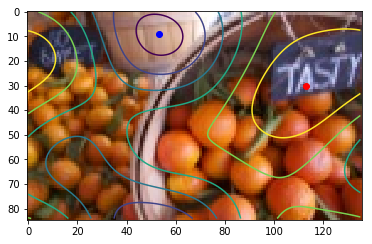

salience/salience_18.png


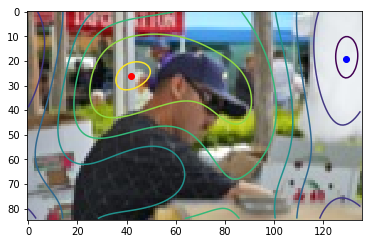

salience/salience_17.png


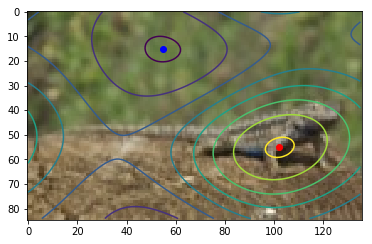

salience/salience_01.png


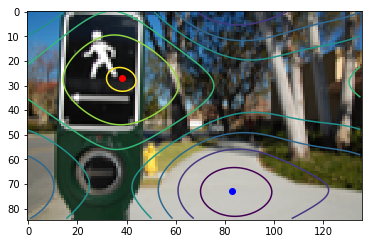

salience/salience_13.png


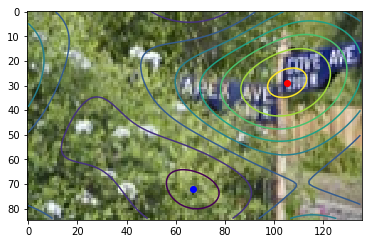

salience/salience_16.png


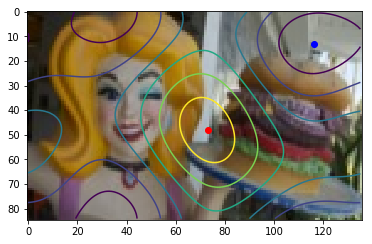

salience/salience_15.png


/home/lu/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2773: RuntimeWarning: invalid value encountered in sqrt
  return ((high - low)/2.0/pi) * sqrt(-2*log(R))
/home/lu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/lu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1535: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/lu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/lu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/lu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found

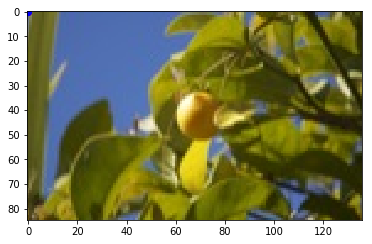

In [19]:
from pathlib import Path

pathlist = Path('./salience/').glob('**/*.png')

for path in pathlist:
    path_in_str = str(path)
    img = plt.imread(path_in_str)
    print(path_in_str)
    plot_saliency_map(img)

shortcomings and comments: 
- the algorithm has no face recognition, but humans are highly sensitive to faces , e.g. the foto 16 & 18 where i expect the first attention in the middle of the face, not the hair (16), and on the human head (18). also in foto 10, i expect more attention on the face of the statue
- the algorithm is more sensitive to regions, but not to small lines e.g. foto 11 where we can see a curl in the middle of the foto, which i expect to be the most likely spot for attention
- the algorithm has no detection for foreground and background of the picture -> especially in foto 12 i would expect the sign in the foreground to be in the center of attention
